#Livro Automatizando tarefas maçantes com Python, Al Sweigart
#Capítulo 7

In [23]:
##List into string
spam = ['apples', 'bananas', 'tofu', 'cats','dogs','Inara']
def uniao(spam):
  string = ''
  indice = 0 
  while indice<len(spam)-1:
    string = string + spam[indice] + ', '
    indice = indice + 1
  string = string + 'and ' + spam[indice]
  return string

In [24]:
uniao(spam)

'apples, bananas, tofu, cats, dogs, and Inara'

# **Regex**

símbolos de regex

• ? corresponde a zero ou uma ocorrência do grupo anterior.

• * corresponde a zero ou mais ocorrências do grupo anterior.

• + corresponde a uma ou mais ocorrências do grupo anterior.

• {n} corresponde a exatamente n ocorrências do grupo anterior.

• {n,} corresponde a n ou mais ocorrências do grupo anterior.

• {,m} corresponde a zero até m ocorrências do grupo anterior.

• {n,m} corresponde a no mínimo n e no máximo m ocorrências do grupo
anterior.

• {n,m}? ou *? ou +? faz uma correspondência nongreedy do grupo anterior.

• ^spam quer dizer que a string deve começar com spam.

• spam$ quer dizer que a string dever terminar com spam.

• . corresponde a qualquer caractere, exceto os caracteres de quebra de linha.
• \d, \w e \s correspondem a um dígito, um caractere de palavra ou um
caractere de espaço, respectivamente.

• \D, \W e \S correspondem a qualquer caractere, exceto um dígito, um
caractere de palavra ou um caractere de espaço, respectivamente.

• [abc] corresponde a qualquer caractere que estiver entre os colchetes (por
exemplo, a, b ou c).

• [^abc] corresponde a qualquer caractere que não esteja entre os colchetes.

In [6]:
#Identificando Padrões sem expressões regulares
def isPhoneNumber(text):
  if len(text) != 12:
    return False
  for i in range(0, 3):
    if not text[i].isdecimal():
      return False
  if text[3] != '-':
    return False
  for i in range(4, 7):
    if not text[i].isdecimal():
      return False
  if text[7] != '-':
    return False
  for i in range(8, 12):
    if not text[i].isdecimal():
      return False
  return True

print(isPhoneNumber('Moshi moshi'))
print(isPhoneNumber('415-555-4242'))

False
True


In [2]:
#Identificando Padrões com expressões regulares
import re
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = phoneNumRegex.search('My number is 415-555-4242.')
print('Phone number found: ' + mo.group())

Phone number found: 415-555-4242


In [9]:
#Usando parênteses para agrupamento
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')
mo = phoneNumRegex.search('My number is 415-555-4242.')
print(mo.group(1))
print(mo.group(2))
print(mo.group(0))
print(mo.group())

415
555-4242
415-555-4242
415-555-4242


In [10]:
#agrupando números em variáveis
mo.groups()
areaCode, mainNumber = mo.groups()
print(areaCode)
print(mainNumber)

415
555-4242


In [12]:
#se número estiver etre parênteses
phoneNumRegex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')
mo = phoneNumRegex.search('My phone number is (415) 555-4242.')
print(mo.group(1))
print(mo.group(2))

(415)
555-4242


In [18]:
#compilador usando pipe ("ou")
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')
mo = batRegex.search('Batmobile lost a wheel')
print(mo.group(1))
print(mo.group())

mobile
Batmobile


In [20]:
#correspondência opcional usando ?
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventures of Batman')
print(mo1.group())

mo2 = batRegex.search('The Adventures of Batwoman')
print(mo2.group())

Batman
Batwoman


In [21]:
#chamada múltipla com * ( “corresponda a zero ou mais”)
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search('The Adventures of Batman')
print(mo1.group())
mo2 = batRegex.search('The Adventures of Batwoman')
print(mo2.group())
mo3 = batRegex.search('The Adventures of Batwowowowoman')
print(mo3.group())

Batman
Batwoman
Batwowowowoman


In [22]:
#Usando Findall -> mais adequado se não há grupos na RegEx
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d') # não tem nenhum grupo
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

['415-555-9999', '212-555-0000']

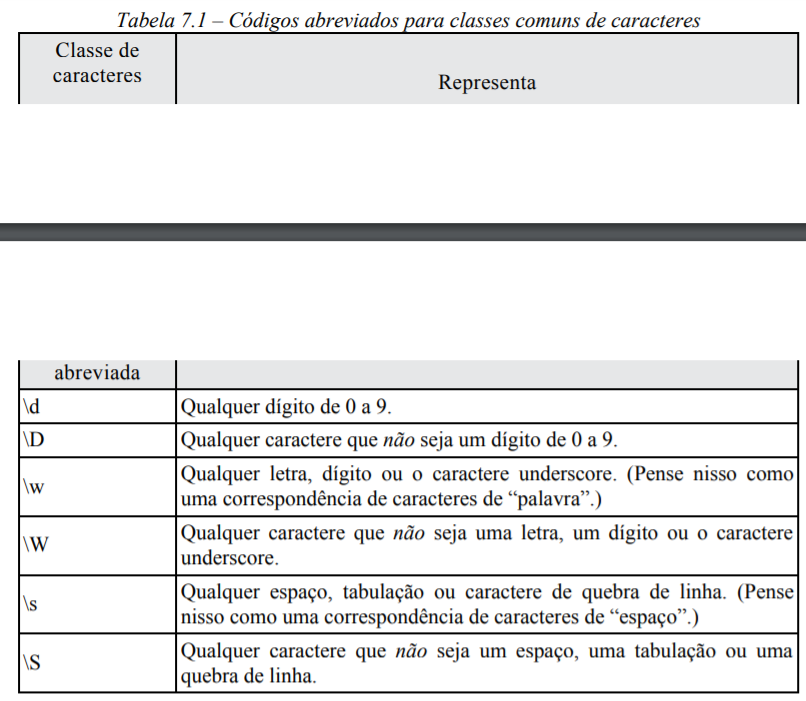

In [23]:
#utilizando caracteres além de dígitos numéricos
xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')

['12 drummers',
 '11 pipers',
 '10 lords',
 '9 ladies',
 '8 maids',
 '7 swans',
 '6 geese',
 '5 rings',
 '4 birds',
 '3 hens',
 '2 doves',
 '1 partridge']

In [24]:
#criando classes usando []
vowelRegex = re.compile(r'[aeiouAEIOU]')
vowelRegex.findall('RoboCop eats baby food. BABY FOOD.')

['o', 'o', 'o', 'e', 'a', 'a', 'o', 'o', 'A', 'O', 'O']

In [25]:
#criando classes negativas
consonantRegex = re.compile(r'[^aeiouAEIOU]')
consonantRegex.findall('RoboCop eats baby food. BABY FOOD.')

['R',
 'b',
 'C',
 'p',
 ' ',
 't',
 's',
 ' ',
 'b',
 'b',
 'y',
 ' ',
 'f',
 'd',
 '.',
 ' ',
 'B',
 'B',
 'Y',
 ' ',
 'F',
 'D',
 '.']

In [26]:
#Caractere Coringa '.'
atRegex = re.compile(r'.at')
atRegex.findall('The cat in the hat sat on the flat mat.')

['cat', 'hat', 'sat', 'lat', 'mat']

In [28]:
# '.*' modo greedy: ele sempre tentará fazer a correspondência do máximo de texto possível.
nameRegex = re.compile(r'First Name: (.*) Last Name: (.*)')
mo = nameRegex.search('First Name: Marcos Last Name: Nogueira')
print(mo.group(1))
print(mo.group(2))

Marcos
Nogueira


In [30]:
#modo nongreedy '.*?'
nongreedyRegex = re.compile(r'<.*?>')
mo = nongreedyRegex.search('<To serve man> for dinner.>')
print(mo.group())

greedyRegex = re.compile(r'<.*>')
mo = greedyRegex.search('<To serve man> for dinner.>')
print(mo.group())

<To serve man>
<To serve man> for dinner.>


In [31]:
#Parâmetro re.IgnoreCase (re.I)
robocop = re.compile(r'robocop', re.I)
robocop.search('RoboCop is part man, part machine, all cop.').group()

'RoboCop'

In [3]:
numRegex = re.compile(r'\d+')
numRegex.sub('X', '12 drummers, 11 pipers, five rings, 3 hens')

'X drummers, X pipers, five rings, X hens'

In [ ]:
#https://gist.github.com/Haolicopter/c5f9d0b7b4ad29493c89544607b42734
import glob, re

destFolder = r'C:\Users\Dell\Downloads'
userRegex = input('Enter your regular expression:\n')

print('We found the following lines matching your regular expression:')
for fileName in glob.glob(destFolder + '/*.txt'):
	txtFile = open(fileName, 'r')
	pattern = re.compile(r"%s"%userRegex)
	for line in txtFile:
		if re.search(pattern, line) is not None:
			print(line, end='')
	txtFile.close()